In [1]:
######################################     Modules     #######################################
# MODULES
import sys
from time import process_time
import pickle
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

sys.path.append('../.')
import verbose_module
sys.path.append('../../../.')
import pIRPgym

path = '/Users/juanbeta/My Drive/Research/Supply Chain Analytics/pIRPgym/'
experiments_path = '/Users/juanbeta/My Drive/Research/Supply Chain Analytics/Experiments/Flower Agent/'

sizes = [5,10,15,20,30,50]
num_episodes = 2000

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-11


# Instance Visualization

### Supplier Availability

In [2]:
def plot_distributions(size,indicator,episode):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        data = pickle.load(file)
    inst_gen = data[2]
    if indicator=='Availability':
        pIRPgym.Visualizations.RoutingV.plot_supplier_distributions(inst_gen.q_parameters,save_fig=True)
    else:
        pIRPgym.Visualizations.RoutingV.plot_supplier_distributions(inst_gen.p_parameters)

interact(plot_distributions,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30],value=10,description='Episodes:'),
         indicator=widgets.Dropdown(options=['Availability','Prices'],value='Availability',description='Indicator:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.plot_distributions(size, indicator, episode)>

### Supplier Locations

In [1]:
def plot_locations(size,episode):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        data = pickle.load(file)
    inst_gen = data[2]
    pIRPgym.Visualizations.RoutingV.render_routes(inst_gen,[],save_fig=True)

interact(plot_locations,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30],value=10,description='Episodes:'))

NameError: name 'interact' is not defined

# Training

In [3]:
def print_training_summary(size,episode):
    Num_Episodes = [10,30,50]
    Num_Suppliers = {10:[10,20,30,40,50],
                  30:[5,10,15,20,30],
                  50:[20,30]}
    
    CG_aa = 0
    GA_aa = 0
    both_aa = 0
    total_aa = 0
    
    for episode in Num_Episodes:
        for size in Num_Suppliers[episode]:
            with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
                _,_,inst_gen,FlowerAgent = pickle.load(file)
            
            for i,gens in enumerate(FlowerAgent.generator):
                total_aa+=1
                if 'CG' in gens:    CG_aa+=1
                if 'GA' in gens:    GA_aa+=1
                if 'CG' in gens and 'GA' in gens:   both_aa+=1

    print(f'---------- Training Summary ----------\n')
    # print(f'Training time: {None}')
    print(f'Number of routes: {FlowerAgent.routes_num}')
    # print(f'Training time: {None}')
    print('\nProportion of generated routes in selected experiment')
    CG_gen,GA_gen,total = pIRPgym.Visualizations.RoutingV.count_generated(FlowerAgent.generator)
    print(f'- Column Generation: {round(100*CG_gen/len(FlowerAgent.routes),2)}%')
    print(f'- Genetic Algorithm: {round(100*GA_gen/len(FlowerAgent.routes),2)}%')
    print(f'- Both: {round(100*total/len(FlowerAgent.routes),2)}%')
    
    print('\nOverall proportion of generated routes')
    CG_gen,GA_gen,total = pIRPgym.Visualizations.RoutingV.count_generated(FlowerAgent.generator)
    print(f'- Column Generation: {round(100*CG_aa/total_aa,2)}%')
    print(f'- Genetic Algorithm: {round(100*GA_aa/total_aa,2)}%')
    print(f'- Both: {round(100*both_aa/total_aa,2)}%')
    

interact(print_training_summary,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'))
         

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.print_training_summary(size, episode)>

### N Table

In [4]:
def plot_n_table(size,episode,suppliers):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,inst_gen,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.n_plot(FlowerAgent.n_table,FlowerAgent.bincod,suppliers)

interact(plot_n_table,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'),
         suppliers=widgets.SelectMultiple(options=['All']+[i for i in range(1,11)],value=[7,8,9],rows=11,description='Suppliers',disabled=False))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.plot_n_table(size, episode, suppliers)>

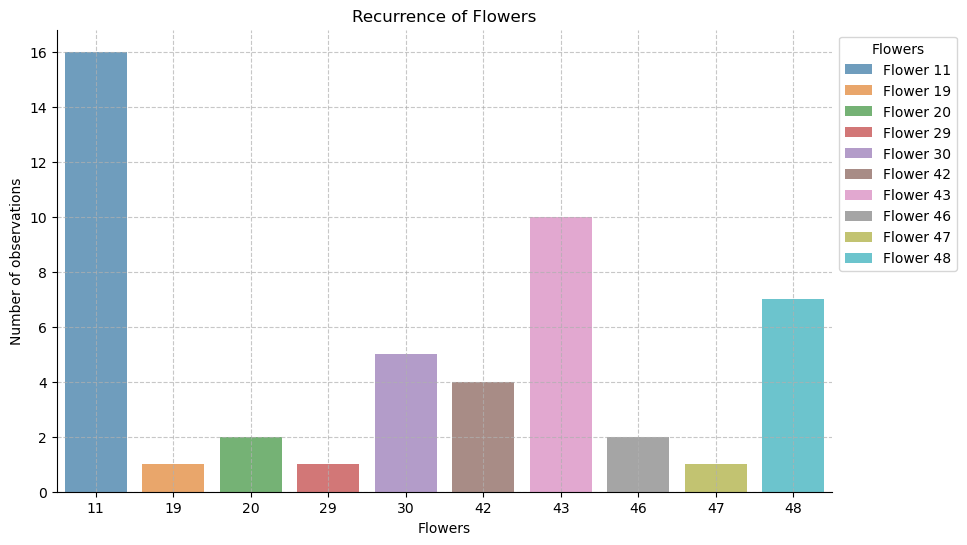

In [3]:
plot_n_table(10,30,[7,8,9])

### Key Performance Indicators

In [5]:
def plot_flower_indicators(size,episode,indicator1,indicator2,suppliers):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,_,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.plot_indicators(FlowerAgent.metrics,FlowerAgent.bincod,indicator1,indicator2,suppliers)

interact(plot_flower_indicators,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'),
         indicator1=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Cost per Supplier','Price Delta'],value='Fixed Service Level',description='x-metric:'),
         indicator2=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Cost per Supplier','Price Delta'],value='Dynamic Service Level',description='y-metric:'),
         suppliers=widgets.SelectMultiple(options=['All']+[i for i in range(1,11)],value=[7,8,9],rows=11,description='Suppliers',disabled=False))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.plot_flower_indicators(size, episode, indicator1, indicator2, suppliers)>

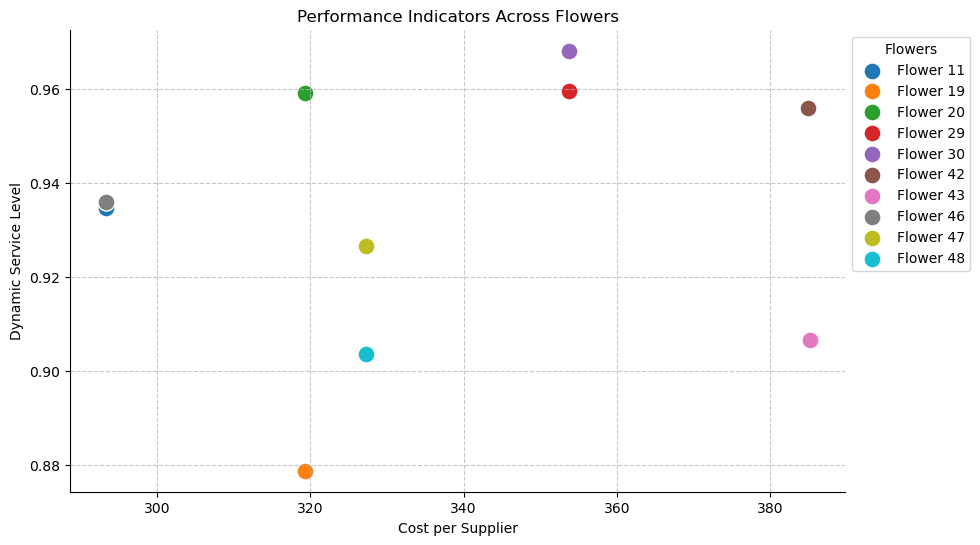

In [3]:
plot_flower_indicators(10,30,'Cost per Supplier','Dynamic Service Level',[7,8,9])

### Visualize routes

In [6]:
def render_routes(size,solution,episode):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,inst_gen,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.render_routes(inst_gen,FlowerAgent.routes[solution])

interact(render_routes,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'),
         solution=widgets.Dropdown(options=range(1,51),value=1,description='Routes:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.render_routes(size, solution, episode)>

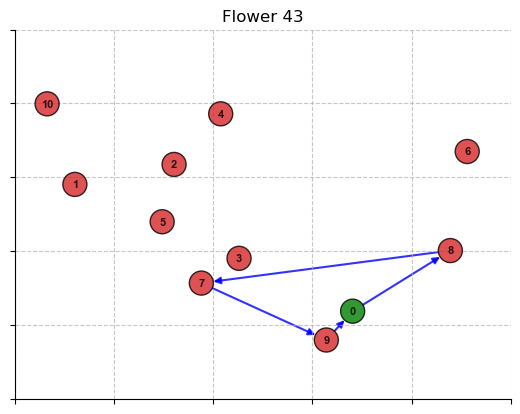

385.20589278675874


In [6]:
with open(experiments_path+f'Training/M10-E30.pkl', 'rb') as file:
    _,_,inst_gen,FlowerAgent = pickle.load(file)
pIRPgym.Visualizations.RoutingV.render_routes(inst_gen,FlowerAgent.routes[43])
print(FlowerAgent.metrics[43][1])

# Flower Analysis and Comparison

### Key Performance Indicators

In [2]:
def plot_flowers_comparison(size,episode,indicator1,indicator2,flower1,flower2):
    with open(experiments_path+f'Training/M{size}-E{episode}.pkl', 'rb') as file:
        _,_,_,FlowerAgent = pickle.load(file)
    print('\n')
    pIRPgym.Visualizations.RoutingV.plot_flower_comparison(FlowerAgent.history,indicator1,indicator2,flower1,flower2)
    print('\n')

interact(plot_flowers_comparison,
         size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'),
         indicator1=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Price Delta'],value='Fixed Service Level',description='x-metric:'),
         indicator2=widgets.Dropdown(options=['Fixed Service Level','Dynamic Service Level','Price Delta'],value='Dynamic Service Level',description='y-metric:'),
         flower1=widgets.Dropdown(options=[i for i in range(1,51)],value=1,description='Flower 1:'),
         flower2=widgets.Dropdown(options=[i for i in range(1,51)],value=2,description='Flower 2:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.plot_flowers_comparison(size, episode, indicator1, indicator2, flower1, flower2)>

# Testing

### Overall performance

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(performance_data,indicator):
    """
    Plot boxplots for different policies.

    Parameters:
    - performance_data (dict): Dictionary containing policies as keys and lists of values as values.
    """
    # Set up figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define a color palette for better visibility
    # colors = ['purple','red','orange','blue','green','brown','cian']
    vals = {'Two Phases':'TwPh','Service Level':'SL','Reactive Service Level':'RSL','Average Service Level':'ASL',
            'Cost':'C','Unitary Cost':'UC'}
    # Plot boxplots for each policy

    for i, (policy, values) in enumerate(performance_data.items()):
        sns.boxplot(x=[vals[policy]]*len(values), y=values, ax=ax)

    # Set labels and title
    ax.set_xlabel('Flower Selection Indicator', fontsize=12)
    ax.set_ylabel('Performance', fontsize=12)
    if indicator != 'Reactive Service Level':
        ax.set_title(indicator, fontsize=14)    
    else:
        ax.set_title('Dynamic Service Level', fontsize=14)    
    

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.savefig(f'./Example_{indicator}.png', dpi = 400)

    # Show the plot
    plt.show()


In [52]:
def plot_performance_boxplots(size,episode,indicator):
    if indicator == 'Transport Cost':pos2=0
    elif indicator == 'Cost per Supplier':pos2=1
    elif indicator == 'Service Level':pos2=0
    elif indicator == 'Reactive Service Level':pos2=1

    with open(experiments_path+f'Testing/Final Phase/M{size}-E{episode}.pkl', 'rb') as file:
        results = pickle.load(file)

    info,TP_results,SL_results,RSL_results,ASL_results,C_results,UC_results,seeds = results.values()

    data = {'Two Phases':list(),'Cost':list(),'Unitary Cost':list(),
            'Reactive Service Level':list(),'Average Service Level':list(),}
    
    vals = [0,0,0,0]
    vals2 = []
    
    for episode in range(info[1]):
        if indicator in ['Transport Cost','Cost per Supplier']:
            data['Two Phases'].append(TP_results[episode][0][2][pos2])
            # data['Service Level'].append(SL_results[episode][0][2][pos2])
            data['Reactive Service Level'].append(RSL_results[episode][0][2][pos2])
            data['Average Service Level'].append(ASL_results[episode][0][2][pos2])
            data['Cost'].append(C_results[episode][0][2][pos2])
            data['Unitary Cost'].append(UC_results[episode][0][2][pos2])
        elif indicator in ['Service Level','Reactive Service Level','Average Service Level']:
            data['Two Phases'].append(TP_results[episode][2][pos2])
            # data['Service Level'].append(SL_results[episode][2][pos2])
            data['Reactive Service Level'].append(RSL_results[episode][2][pos2])
            data['Average Service Level'].append(ASL_results[episode][2][pos2])
            data['Cost'].append(C_results[episode][2][pos2])
            data['Unitary Cost'].append(UC_results[episode][2][pos2])
        else:
            data['Two Phases'].append(TP_results[episode][1][1])
            # data['Service Level'].append(SL_results[episode][1][1])
            data['Reactive Service Level'].append(RSL_results[episode][1][1])
            data['Average Service Level'].append(ASL_results[episode][1][1])
            data['Cost'].append(C_results[episode][1][1])
            data['Unitary Cost'].append(UC_results[episode][1][1])
    
    for i in range(len(data['Two Phases'])):
        vals[0]+=int(data['Cost'][i]==data['Two Phases'][i])/len(data['Two Phases'])
        vals[1]+=int(data['Unitary Cost'][i]==data['Two Phases'][i])/len(data['Two Phases'])
        vals[2]+=int(data['Reactive Service Level'][i]==data['Two Phases'][i])/len(data['Two Phases'])
        vals[3]+=int(data['Average Service Level'][i]==data['Two Phases'][i])/len(data['Two Phases'])
        # vals[3].append(int(data['Purchase Cost'][i]==data['Two Phases'][i])/len(data['Two Phases']))
    
        # vals2[0].append(data['Cost']==data['Two Phases'])
        # vals2[1].append(data['Unitary Cost']==data['Two Phases'])
        # vals2[2].append(data['Reactive Service Level']==data['Two Phases'])
        # vals2[3].append(data['Purchase Cost']==data['Two Phases'])
    # print(vals)
    plot_boxplots(data,indicator)
    # pIRPgym.Visualizations.RoutingV.n_plot(FlowerAgent.n_table,FlowerAgent.bincod,indicator)

interact(plot_performance_boxplots,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         episode=widgets.Dropdown(options=[10,30,50],value=30,description='Episodes:'),
         indicator=widgets.Dropdown(options=['Transport Cost','Cost per Supplier','Service Level',
                                             'Reactive Service Level','Purchase Cost'],
                                    value='Transport Cost',description='Indicator:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, 50), value=10),…

<function __main__.plot_performance_boxplots(size, episode, indicator)>

[1.0, 1.0, 1.11, 1.14]
[-0.01, -0.01, -0.01, 0.05]
[0.08, 0.08, 0.06, 0.09]


[0.41, 0.39, 0.37, 0.37]
[-0.05, -0.05, -0.12, -0.12]
[0.1, 0.06, 0.09, 0.09]


[0.64, 0.54, 0.53, 0.53]
[-0.1, -0.04, -0.09, -0.09]
[0.1, 0.08, 0.08, 0.08]


[0.33, 0.35, 0.32, 0.32]
[-0.2, -0.18, -0.18, -0.17]
[0.03, 0.02, 0.03, 0.03]


[0.34, 0.14, 0.17, 0.19]
[-0.2, -0.17, -0.21, -0.21]
[0.02, 0.02, 0.02, 0.04]




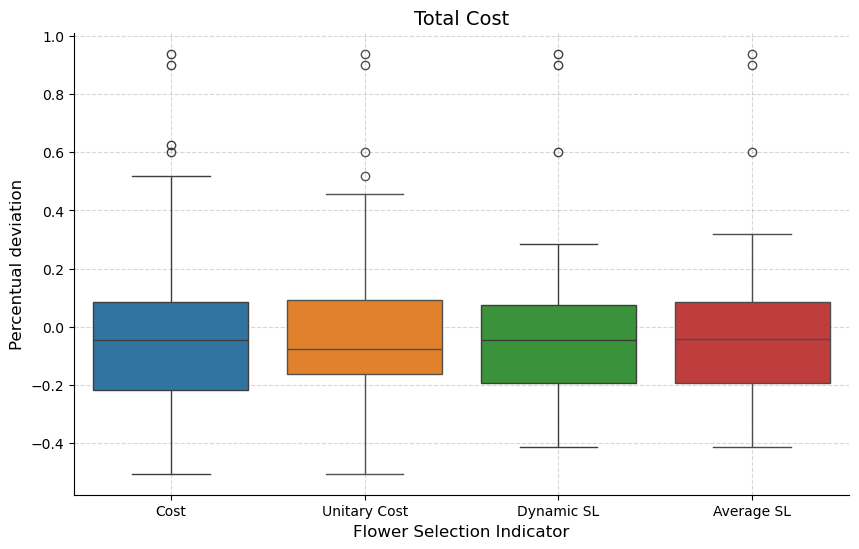

In [58]:
Supps = [5,10,15,20,30]
Episodes = {5:[30],10:[10,30],15:[30],
            20:[10,30,50],30:[30]}

indicators = ['Cost','Unitary Cost','Reactive Service Level','Average Service Level']
data = {i:list() for i in indicators}

def plot_boxplots(performance_data):
    """
    Plot boxplots for different policies.

    Parameters:
    - performance_data (dict): Dictionary containing policies as keys and lists of values as values.
    """
    # Set up figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define a color palette for better visibility
    # colors = ['purple','red','orange','blue','green','brown','cian']
    vals = {'Two Phases':'TwPh','Service Level':'SL','Reactive Service Level':'Dynamic SL','Average Service Level':'Average SL',
            'Cost':'Cost','Unitary Cost':'Unitary Cost'}
    # Plot boxplots for each policy

    for i, (policy, values) in enumerate(performance_data.items()):
        sns.boxplot(x=[vals[policy]]*len(values), y=values, ax=ax)

    # Set labels and title
    ax.set_xlabel('Flower Selection Indicator', fontsize=12)
    ax.set_ylabel('Percentual deviation', fontsize=12)
    ax.set_title('Total Cost', fontsize=14)

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.5)

    # Show the plot
    plt.show()



for size in Supps:
    vals = [list() for i in range(4)]
    vals1 = [list() for i in range(4)]
    vals2 = [list() for i in range(4)]
    vals3 = [list() for i in range(4)]

    for episode in Episodes[size]:
        with open(experiments_path+f'Testing/Final Phase/M{size}-E{episode}.pkl', 'rb') as file:
            results = pickle.load(file)
        info,TP_results,SL_results,RSL_results,ASL_results,C_results,UC_results,seeds = results.values()
        
        


        for t in range(info[0].T):

            routing_cost = TP_results[t][0][2][0]
            purchase_cost = TP_results[t][1][1]
            service_level = TP_results[t][2][1]
            total_cost = routing_cost+purchase_cost

            ''' C '''
            c_r_cost = C_results[t][0][2][0];c_r_prop = c_r_cost/routing_cost - 1
            c_p_cost = C_results[t][1][1];c_p_prop = c_p_cost/purchase_cost - 1
            c_dsl = C_results[t][2][1];c_sl_prop = c_dsl/service_level - 1
            vals[0].append(c_r_prop)
            vals1[0].append(c_p_prop)
            vals2[0].append(c_sl_prop)

            c_total = c_r_cost+c_p_cost
            c_proportion =  c_total/total_cost - 1
            data['Cost'].append(c_proportion)

            ''' UC '''
            uc_r_cost = UC_results[t][0][2][0];uc_r_prop = uc_r_cost/routing_cost - 1
            uc_p_cost = UC_results[t][1][1];uc_p_prop = uc_p_cost/purchase_cost - 1
            uc_dsl = UC_results[t][2][1];uc_sl_prop = uc_dsl/service_level - 1
            vals[1].append(uc_r_prop)
            vals1[1].append(uc_p_prop)
            vals2[1].append(uc_sl_prop)

            uc_total = uc_r_cost+uc_p_cost
            uc_proportion = uc_total/total_cost - 1
            data['Unitary Cost'].append(uc_proportion)

            ''' RSL '''
            rsl_r_cost = RSL_results[t][0][2][0];rsl_r_prop = rsl_r_cost/routing_cost - 1
            rsl_p_cost = RSL_results[t][1][1];rsl_p_prop = rsl_p_cost/purchase_cost - 1
            rsl_dsl = RSL_results[t][2][1];rsl_sl_prop = rsl_dsl/service_level - 1
            vals[2].append(rsl_r_prop)
            vals1[2].append(rsl_p_prop)
            vals2[2].append(rsl_sl_prop)

            rsl_total = rsl_r_cost+rsl_p_cost
            rsl_proportion = rsl_total/total_cost - 1
            data['Reactive Service Level'].append(rsl_proportion)

            ''' ASL '''
            asl_r_cost = ASL_results[t][0][2][0];asl_r_prop = asl_r_cost/routing_cost - 1
            asl_p_cost = ASL_results[t][1][1];asl_p_prop = asl_p_cost/purchase_cost - 1
            asl_dsl = ASL_results[t][2][1];asl_sl_prop = asl_dsl/service_level - 1
            vals[3].append(asl_r_prop)
            vals1[3].append(asl_p_prop)
            vals2[3].append(asl_sl_prop)

            asl_total = asl_r_cost+asl_p_cost
            asl_proportion = asl_total/total_cost - 1
            data['Average Service Level'].append(asl_proportion)
    
    vals = [round(sum(i)/len(i),2) for i in vals]
    vals1 = [round(sum(i)/len(i),2) for i in vals1]
    vals2 = [round(sum(i)/len(i),2) for i in vals2]
    print(vals)
    print(vals1)
    print(vals2)
    print('\n')

plot_boxplots(data)